In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm
import h5py

# Caminho do arquivo FITS
file_fits = "C:\\\\Users\\\\stefa\\\\OneDrive\\\\Documentos\\\\NATALI TCC\\\\hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abrir o arquivo FITS
hdulist = fits.open(file_fits)

# Acessar o cabeçalho do primeiro HDU (hdu[0])
header = hdulist[0].header

# Definir a seed para garantir a mesma seleção de imagens
# np.random.seed(206265)  # descomente para obter sempre a mesma seleção

# Selecionar 16 imagens aleatórias
example_ids = np.random.choice(hdulist[1].data.shape[0], 16)
print(example_ids)

# Pegar as imagens F160W (índice=1) e F814W (índice=0) do conjunto de dados simulado para as seleções
examples_f160w = [hdulist[0].data[j, 1, :, :] for j in example_ids]
examples_f814w = [hdulist[0].data[j, 0, :, :] for j in example_ids]

# Extrai os dados dos HDUs
data_hdu0 = hdulist[0].data
data_hdu1 = hdulist[1].data

# Cria as listas de merge e non-merge
list_of_mergers = []
list_of_nonmergers = []

# Itera sobre os dados do HDU 1 e classifica as imagens
for i in range(len(data_hdu1)):
    if data_hdu1[i][0] == 0:  # Acessa o elemento da tupla
        list_of_mergers.append(i)
    else:
        list_of_nonmergers.append(i)

# Salva as listas em arquivos HDF5
with h5py.File("list_of_mergers.hdf5", "w") as f:
    f.create_dataset("mergers", data=np.array(list_of_mergers))

with h5py.File("list_of_nonmergers.hdf5", "w") as f:
    f.create_dataset("non_mergers", data=np.array(list_of_nonmergers))

# Imprime o comprimento e o shape das listas
print(f"Comprimento da lista de mergers: {len(list_of_mergers)}")
print(f"Shape da lista de mergers: {np.array(list_of_mergers).shape}")
print(f"Comprimento da lista de non-mergers: {len(list_of_nonmergers)}")
print(f"Shape da lista de non-mergers: {np.array(list_of_nonmergers).shape}")

# Imprime o shape e o comprimento dos arquivos HDF5
with h5py.File("list_of_mergers.hdf5", "r") as f:
    print(f"Shape do arquivo list_of_mergers.hdf5: {f['mergers'].shape}")
    print(f"Comprimento do arquivo list_of_mergers.hdf5: {len(f['mergers'])}")

with h5py.File("list_of_nonmergers.hdf5", "r") as f:
    print(f"Shape do arquivo list_of_nonmergers.hdf5: {f['non_mergers'].shape}")
    print(f"Comprimento do arquivo list_of_nonmergers.hdf5: {len(f['non_mergers'])}")

hdulist.close()

[ 7196 13206 13816  1532 10620  7411  8727  4038  8480 12388 13558  4468
  4140 10888  5845  3418]
Comprimento da lista de mergers: 7306
Shape da lista de mergers: (7306,)
Comprimento da lista de non-mergers: 8120
Shape da lista de non-mergers: (8120,)
Shape do arquivo list_of_mergers.hdf5: (7306,)
Comprimento do arquivo list_of_mergers.hdf5: 7306
Shape do arquivo list_of_nonmergers.hdf5: (8120,)
Comprimento do arquivo list_of_nonmergers.hdf5: 8120


In [3]:
import astropy.io.fits as fits
import numpy as np
import h5py

# Load the FITS file
file_fits = "C:\\Users\\stefa\\OneDrive\\Documentos\\NATALI TCC\\hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"
hdulist = fits.open(file_fits) 
data_hdu0 = hdulist[0].data 

# Load the IDs from HDF5 files
with h5py.File("list_of_mergers.hdf5", "r") as f:
    mergers_ids = f["mergers"][:]  # Access the "mergers" dataset
with h5py.File("list_of_nonmergers.hdf5", "r") as f:
    non_mergers_ids = f["non_mergers"][:]  # Access the "non_mergers" dataset

# Cria o conjunto de dados X (imagens) e Y (labels)
X = data_hdu0[mergers_ids]  # Seleciona apenas as imagens de merges
Y = np.zeros(len(mergers_ids))  # Cria um array de labels com zeros (merges)

# Para o conjunto de dados de non-merges, use:
X_non_merges = data_hdu0[non_mergers_ids]  # Seleciona apenas as imagens de non-merges
Y_non_merges = np.ones(len(non_mergers_ids))  # Cria um array de labels com uns (non-merges)

# Combine the datasets if needed
X = np.concatenate((X, X_non_merges))
Y = np.concatenate((Y, Y_non_merges))

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Transposição dos dados
X = X.transpose(0, 2, 3, 1)  # Transpõe para (N, altura, largura, canais)

# Normalização dos dados
scaler = MinMaxScaler()
X = scaler.fit_transform(X.reshape(X.shape[0], -1))  # Redimensiona para normalizar
X = X.reshape(X.shape[0], 75, 75, 2)  # Retorna para a forma original

print("Dados transpostos e normalizados com sucesso!")

Dados transpostos e normalizados com sucesso!


In [6]:
from sklearn.model_selection import train_test_split

# Divisão dos dados em treino, teste e validação
random_seed = 42
X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, test_size=0.3, random_state=random_seed) # 70% treino, 30% restante
X_test, X_val, Y_test, Y_val = train_test_split(X_rem, Y_rem, test_size=1/3, random_state=random_seed) # 2/3 do restante é teste, 1/3 do restante é validação

print("Dados divididos em treino, teste e validação com sucesso!")

Dados divididos em treino, teste e validação com sucesso!


In [8]:
print("Primeiras linhas do conjunto de treinamento:")
print(X_train[:5])
print("\nPrimeiras linhas do conjunto de teste:")
print(X_test[:5])

Primeiras linhas do conjunto de treinamento:
[[[[5.07271849e-05 2.15752768e-05]
   [2.11175944e-05 1.45643467e-05]
   [1.06612309e-05 1.25242481e-06]
   ...
   [2.85143112e-05 1.54882312e-04]
   [1.59627473e-04 1.48636528e-04]
   [8.28319795e-05 8.51382295e-05]]

  [[2.59446109e-05 1.36839844e-05]
   [1.20737221e-05 9.57678623e-06]
   [8.57559605e-06 1.00049613e-05]
   ...
   [1.18031306e-04 1.05677984e-04]
   [1.16895130e-04 1.09203575e-04]
   [7.34831727e-05 4.63267535e-05]]

  [[3.50075579e-06 2.50178250e-06]
   [1.46019945e-06 8.41316160e-06]
   [3.24560770e-05 3.63509103e-05]
   ...
   [1.31297041e-04 9.32969761e-05]
   [1.00470390e-04 7.32017791e-05]
   [2.53664985e-05 1.01831802e-05]]

  ...

  [[7.18817661e-07 2.44090174e-06]
   [1.39378549e-05 9.37602440e-06]
   [8.06835084e-06 6.92665672e-06]
   ...
   [2.39784594e-05 1.07158372e-05]
   [1.22785430e-05 2.17233125e-06]
   [1.10962194e-06 2.37820306e-06]]

  [[5.44098396e-06 7.75082486e-06]
   [1.90943843e-06 9.68398579e-07]
  

In [9]:
# Salvar os dados pré-processados
np.save("X_train.npy", X_train)
np.save("Y_train.npy", Y_train)
np.save("X_test.npy", X_test)
np.save("Y_test.npy", Y_test)
np.save("X_val.npy", X_val)
np.save("Y_val.npy", Y_val)

print("Dados pré-processados salvos com sucesso!")

Dados pré-processados salvos com sucesso!


In [10]:
# Imprime o tamanho e o shape
print("Conjunto de Treinamento:")
print(f"Tamanho de X_train: {X_train.shape[0]}")
print(f"Shape de X_train: {X_train.shape}")
print(f"Tamanho de Y_train: {Y_train.shape[0]}")
print(f"Shape de Y_train: {Y_train.shape}")

print("\nConjunto de Teste:")
print(f"Tamanho de X_test: {X_test.shape[0]}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Tamanho de Y_test: {Y_test.shape[0]}")
print(f"Shape de Y_test: {Y_test.shape}")

print("\nConjunto de Validação:")
print(f"Tamanho de X_val: {X_val.shape[0]}")
print(f"Shape de X_val: {X_val.shape}")
print(f"Tamanho de Y_val: {Y_val.shape[0]}")
print(f"Shape de Y_val: {Y_val.shape}")

Conjunto de Treinamento:
Tamanho de X_train: 10798
Shape de X_train: (10798, 75, 75, 2)
Tamanho de Y_train: 10798
Shape de Y_train: (10798,)

Conjunto de Teste:
Tamanho de X_test: 3085
Shape de X_test: (3085, 75, 75, 2)
Tamanho de Y_test: 3085
Shape de Y_test: (3085,)

Conjunto de Validação:
Tamanho de X_val: 1543
Shape de X_val: (1543, 75, 75, 2)
Tamanho de Y_val: 1543
Shape de Y_val: (1543,)


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import numpy as np
import json
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop

In [36]:
# Define the model input shape
input_shape = (75, 75, 2)  # Adjust to your data shape
input_tensor = Input(shape=input_shape)

In [37]:
# Convolutional layers
x = Conv2D(8, (5, 5), activation='relu', strides=(1, 1), padding='same', data_format='channels_last', kernel_regularizer=regularizers.l2(0.0001))(input_tensor)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last')(x)
x = Dropout(0.2)(x)

x = Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same', data_format='channels_last', kernel_regularizer=regularizers.l2(0.0001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last')(x)
x = Dropout(0.3)(x)

x = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same', data_format='channels_last', kernel_regularizer=regularizers.l2(0.0001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last')(x)
x = Dropout(0.4)(x)

# Dense layers
x = Flatten()(x)
x = Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001))(x)  # Reduzido para 32 neurônios
x = Dropout(0.5)(x)
x = Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001))(x)  # Reduzido para 16 neurônios
x = Dropout(0.5)(x)

# Output layer
output_tensor = Dense(1, activation='sigmoid')(x)

In [38]:
# Create the model
model = Model(inputs=input_tensor, outputs=output_tensor)

In [39]:
# Parâmetros de compilação
optimizer = Adam()
metrics = ['accuracy']
loss = 'binary_crossentropy'

In [40]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
# Caminho para salvar checkpoints
checkpoint_filepath = 'melhor_modelo_pesos.weights.keras'

In [42]:
# Callbacks
checkpoint = ModelCheckpoint(
    filepath='melhor_modelo_pesos.weights.keras',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True,
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=50,  # Stop training if validation accuracy doesn't improve for 5 epochs
    restore_best_weights=True  # Restore the best model weights after stopping
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor the validation loss to trigger learning rate reduction
    factor=0.5,  # Reduce the learning rate by a factor of 0.5
    patience=50,  # Reduce the learning rate if validation loss doesn't improve for 5 epochs
    min_lr=1e-05  # Minimum learning rate to prevent it from becoming too small
)

#Combine callbacks into a list:
callbacks = [checkpoint, early_stopping, reduce_lr]

In [43]:
# Carregar dados pré-processados
X_train = np.load("X_train.npy")
Y_train = np.load("Y_train.npy")
X_val = np.load("X_val.npy")
Y_val = np.load("Y_val.npy")
X_test = np.load("X_test.npy")
Y_test = np.load("Y_test.npy")

# Imprimir formatos dos dados
print("Formato de X_train:", X_train.shape)
print("Formato de Y_train:", Y_train.shape)
print("Formato de X_val:", X_val.shape)
print("Formato de Y_val:", Y_val.shape)
print("Formato de X_test:", X_test.shape)
print("Formato de Y_test:", Y_test.shape)

Formato de X_train: (10798, 75, 75, 2)
Formato de Y_train: (10798,)
Formato de X_val: (1543, 75, 75, 2)
Formato de Y_val: (1543,)
Formato de X_test: (3085, 75, 75, 2)
Formato de Y_test: (3085,)


In [44]:
# Train the model
history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, Y_val),
    shuffle=True,
    verbose=1,
    callbacks=callbacks  # Now you're passing the list of callbacks
)

Epoch 1/50
337/338 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5032 - loss: 1.2017
Epoch 1: val_accuracy improved from -inf to 0.48477, saving model to melhor_modelo_pesos.weights.keras
338/338 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.5033 - loss: 1.2015 - val_accuracy: 0.4848 - val_loss: 0.9362 - learning_rate: 1.0000e-04
Epoch 2/50
336/338 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5049 - loss: 1.0553
Epoch 2: val_accuracy improved from 0.48477 to 0.53921, saving model to melhor_modelo_pesos.weights.keras
338/338 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5049 - loss: 1.0551 - val_accuracy: 0.5392 - val_loss: 0.9286 - learning_rate: 1.0000e-04
Epoch 3/50
336/338 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4971 - loss: 0.9816
Epoch 3: val_accuracy improved from 0.53921 to 0.56967, saving model to melhor_modelo_pesos.weights.keras
338/338 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.4972 - loss: 0.9816 - val_accuracy: 0.5697 - val_loss: 0.9254 - learning_

In [45]:
# Salvar histórico, pesos e modelo
with open("history.json", "w") as f:
    json.dump(history.history, f)

model.save_weights("pesos_modelo.weights.h5")
model.save("modelo.keras")

# Carregar modelo salvo (apenas uma vez)
loaded_model = load_model("modelo.keras")

# Criar otimizador rmsprop (apenas uma vez)
rmsprop = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07)

# Compilar o modelo com rmsprop (apenas uma vez)
loaded_model.compile(
    optimizer=rmsprop,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [46]:
# Imprime o histórico
print(history.history)

{'accuracy': [0.5075013637542725, 0.5026856660842896, 0.5038896203041077, 0.5417670011520386, 0.5557510852813721, 0.5552880167961121, 0.5619559288024902, 0.5588071942329407, 0.5687164068222046, 0.5743656158447266, 0.5733469128608704, 0.576773464679718, 0.5826078653335571, 0.5864974856376648, 0.5944619178771973, 0.5992776155471802, 0.6016855239868164, 0.6111316680908203, 0.610390841960907, 0.6120578050613403, 0.6164104342460632, 0.6241896748542786, 0.6265048980712891, 0.631783664226532, 0.6333580017089844, 0.6354880332946777, 0.6397480964660645, 0.6459529399871826, 0.6466012001037598, 0.6492869257926941, 0.6522504091262817, 0.6449342370033264, 0.6564178466796875, 0.6518799662590027, 0.6534543633460999, 0.6576218008995056, 0.6579922437667847, 0.6619744300842285, 0.6568809151649475, 0.6612335443496704, 0.6686423420906067, 0.6610483527183533, 0.6676236391067505, 0.6689201593399048, 0.6693832278251648, 0.6754028797149658, 0.6691979765892029, 0.6746619939804077, 0.6753102540969849, 0.6803111

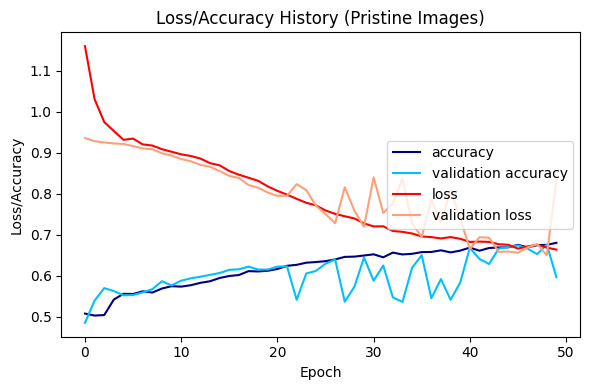

In [47]:
# Plotar histórico
with open("history.json", "r") as f:
    history_data = json.load(f)

loss = history_data['loss']
val_loss = history_data['val_loss']
acc = history_data['accuracy']
val_acc = history_data['val_accuracy']

epochs = list(range(len(loss)))
figsize=(6,4)
fig, axis1 = plt.subplots(figsize=figsize)

plot1_lacc = axis1.plot(epochs, acc, 'navy', label='accuracy')
plot1_val_lacc = axis1.plot(epochs, val_acc, 'deepskyblue', label="validation accuracy")
plot1_loss = axis1.plot(epochs, loss, 'red', label='loss')
plot1_val_loss = axis1.plot(epochs, val_loss, 'lightsalmon', label="validation loss")

plots = plot1_loss + plot1_val_loss + plot1_lacc + plot1_val_lacc
labs = [l.get_label() for l in plots]
axis1.set_xlabel('Epoch')
axis1.set_ylabel('Loss/Accuracy')
plt.title("Loss/Accuracy History (Pristine Images)")
plt.tight_layout()
axis1.legend(loc='center right')

plt.show()

In [54]:
import json
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, brier_score_loss
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 

In [55]:
# Carregar histórico
with open("history.json", "r") as f:
    history_data = json.load(f)

# predict
prob = loaded_model.predict(X_test)
pred =  (prob > 0.5).astype('int32') 

# measure confusion
labels=[0, 1]
cm = confusion_matrix(Y_test, pred[:,0], labels=labels)  # Use Y_test aqui
cm = cm.astype('float')
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
print("cm", cm)
print("\n cm_norm", cm_norm)

fpr, tpr, thresholds = roc_curve(Y_test, prob, pos_label=1)  # Use Y_test aqui
auc = roc_auc_score(Y_test, prob)
print("\n AUC:", auc)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
cm [[ 742.  722.]
 [ 227. 1394.]]

 cm_norm [[0.5068306  0.4931694 ]
 [0.14003701 0.85996299]]

 AUC: 0.7779816564018027


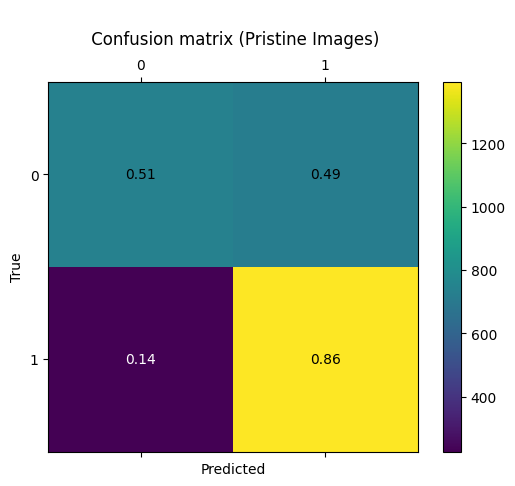

In [58]:
#plotting
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('\n Confusion matrix (Pristine Images)', y=1.08)
fig.colorbar(cax)

# Defina as posições dos ticks
ax.set_xticks([0, 1])  # Define as posições dos ticks no eixo x
ax.set_yticks([0, 1])  # Define as posições dos ticks no eixo y

# Agora defina as labels dos ticks
ax.set_xticklabels(labels)  # Remove o elemento vazio da lista
ax.set_yticklabels(labels)  # Remove o elemento vazio da lista

plt.xlabel('Predicted')
plt.ylabel('True')
fmt = '.2f'
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm_norm[i, j], fmt),
        ha="center", va="center",
        color="white" if cm_norm[i, j] < thresh else "black")
plt.show()

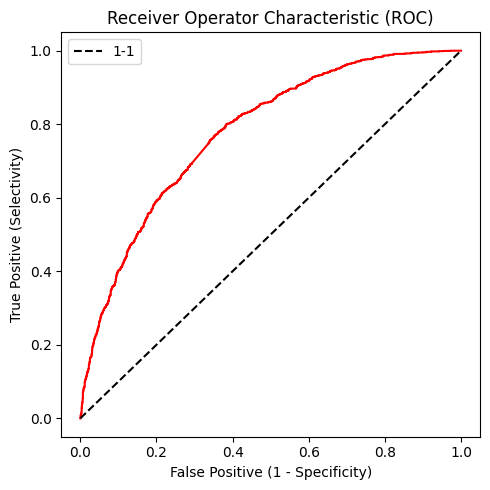

In [59]:
# ROC TEST SET
figsize=(5,5)
fig, axis1 = plt.subplots(figsize=figsize)
x_onetoone = y_onetoone = [0, 1]
plt.plot(fpr, tpr, 'r-')
plt.plot(x_onetoone, y_onetoone, 'k--',  label="1-1")
plt.legend(loc=0)
plt.title("Receiver Operator Characteristic (ROC)")
plt.xlabel("False Positive (1 - Specificity)")
plt.ylabel("True Positive (Selectivity)")
plt.tight_layout()

In [60]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, pred[:,0])  # Access the first column
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(Y_test, pred[:,0])  # Access the first column
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, pred[:,0])  # Access the first column
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, pred[:,0])  # Access the first column
print('F1 score: %f' % f1)

# brier score
bs = brier_score_loss(Y_test, prob)
print('Brier score: %f' % bs)

Accuracy: 0.692382
Precision: 0.658790
Recall: 0.859963
F1 score: 0.746053
Brier score: 0.195949


In [61]:
# seraching for examples
for i in range(len(Y_test)):
    if (Y_test[i] == 1 and pred[i,0] == 1): # and other y_test vs pered combinations TP=(1,1), FP=(0,1), TN=(0,0), FN=(1,0)
        print (i)
        print(Y_test[i],pred[i,0]) # Access the first column of pred

0
1.0 1
3
1.0 1
8
1.0 1
9
1.0 1
10
1.0 1
11
1.0 1
14
1.0 1
18
1.0 1
19
1.0 1
21
1.0 1
30
1.0 1
31
1.0 1
34
1.0 1
39
1.0 1
41
1.0 1
43
1.0 1
48
1.0 1
50
1.0 1
51
1.0 1
54
1.0 1
56
1.0 1
61
1.0 1
62
1.0 1
63
1.0 1
64
1.0 1
65
1.0 1
66
1.0 1
68
1.0 1
70
1.0 1
71
1.0 1
73
1.0 1
75
1.0 1
76
1.0 1
78
1.0 1
79
1.0 1
80
1.0 1
81
1.0 1
83
1.0 1
85
1.0 1
88
1.0 1
90
1.0 1
92
1.0 1
93
1.0 1
96
1.0 1
98
1.0 1
99
1.0 1
100
1.0 1
103
1.0 1
105
1.0 1
106
1.0 1
107
1.0 1
110
1.0 1
111
1.0 1
113
1.0 1
115
1.0 1
116
1.0 1
117
1.0 1
124
1.0 1
126
1.0 1
127
1.0 1
130
1.0 1
131
1.0 1
132
1.0 1
134
1.0 1
136
1.0 1
146
1.0 1
148
1.0 1
149
1.0 1
150
1.0 1
154
1.0 1
157
1.0 1
160
1.0 1
161
1.0 1
162
1.0 1
163
1.0 1
164
1.0 1
167
1.0 1
171
1.0 1
172
1.0 1
173
1.0 1
174
1.0 1
178
1.0 1
179
1.0 1
180
1.0 1
182
1.0 1
184
1.0 1
187
1.0 1
188
1.0 1
191
1.0 1
192
1.0 1
198
1.0 1
199
1.0 1
200
1.0 1
201
1.0 1
203
1.0 1
205
1.0 1
206
1.0 1
207
1.0 1
208
1.0 1
210
1.0 1
211
1.0 1
221
1.0 1
225
1.0 1
226
1.0 1
228
1.0 1


In [62]:
#print output probabilities for the chosen TP, FP, TN, FN examples
print(prob[84],prob[1370],prob[2031],prob[3003]) # TP examples
print(prob[560],prob[1228],prob[2878],prob[3026]) # FP examples
print(prob[564],prob[1056],prob[2083],prob[3063]) # TN examples
print(prob[465],prob[1546],prob[2241],prob[3037]) # FN examples

[0.14023657] [0.7527949] [0.78826123] [0.36008355]
[0.7742394] [0.8321802] [0.7054747] [0.543285]
[0.7155924] [0.61478746] [0.38105085] [0.6644255]
[0.46119803] [0.59167874] [0.29644927] [0.66781723]


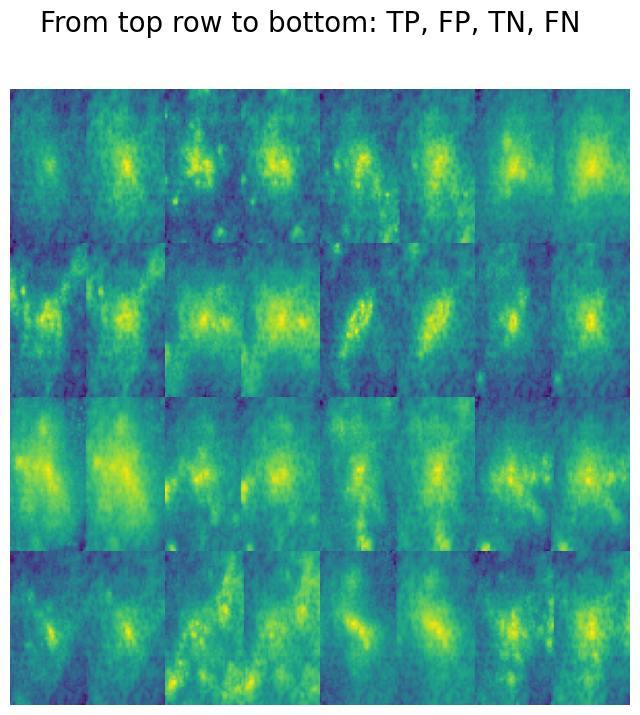

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# ... (código anterior para carregar dados, etc.)

# plot examples
tp1 = X_test[84]  # Acessa toda a imagem do exemplo 84
tp2 = X_test[1370]
tp3 = X_test[2031]
tp4 = X_test[3003]

fp1 = X_test[560]
fp2 = X_test[1228]
fp3 = X_test[2878]
fp4 = X_test[3026]

tn1 = X_test[564]
tn2 = X_test[1056]
tn3 = X_test[2083]
tn4 = X_test[3063]

fn1 = X_test[465]
fn2 = X_test[1546]
fn3 = X_test[2241]
fn4 = X_test[3037]

examples = [tp1, tp2, tp3, tp4, fp1, fp2, fp3, fp4, tn1, tn2, tn3, tn4, fn1, fn2, fn3, fn4]

# Aplica a normalização logarítmica
examples = [np.log(image + 1) for image in examples]  

fig1=plt.figure(figsize=(8,8))

for i, image in enumerate(examples):
    fig1.suptitle('From top row to bottom: TP, FP, TN, FN', fontsize=20)
    plt.subplot(4, 4, i + 1)
    plt.axis("off")
    # Combine os canais em uma única imagem
    combined_image = np.mean(image, axis=2) 
    plt.imshow(combined_image, aspect='auto', cmap='viridis', norm=LogNorm()) 
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

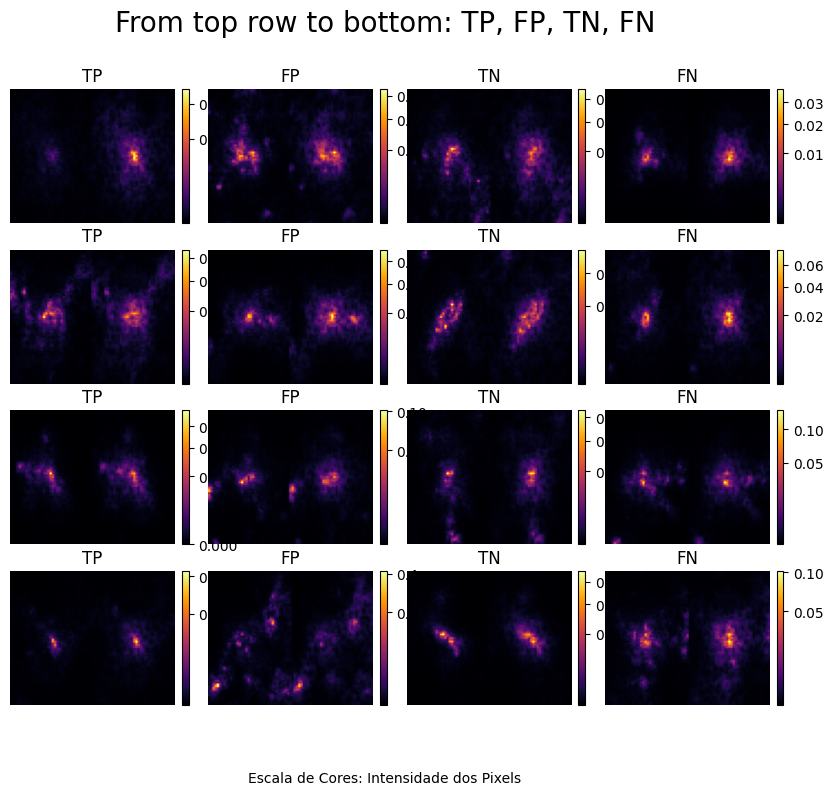

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, PowerNorm

fig1 = plt.figure(figsize=(10, 8))  # Ajuste o tamanho da figura

for i, image in enumerate(examples):
    # Define os rótulos
    labels = ['TP', 'FP', 'TN', 'FN']
    label = labels[i % len(labels)] 

    fig1.suptitle('From top row to bottom: TP, FP, TN, FN', fontsize=20)
    plt.subplot(4, 4, i + 1)
    plt.axis("off")

    # Combine os canais em uma única imagem
    combined_image = np.mean(image, axis=2)

    # Ajuste de Contraste:
    norm = PowerNorm(gamma=0.5) 

    # Plota a imagem
    img = plt.imshow(combined_image, aspect='auto', cmap='inferno', norm=norm) 
    plt.title(label, fontsize=12)  # Adiciona o rótulo

    # Adiciona uma barra de cores
    plt.colorbar(img, fraction=0.046, pad=0.04) 

# Ajusta o espaçamento entre as subplots
plt.subplots_adjust(hspace=0.2, wspace=0.1)  

# Adiciona a explicação da escala na parte inferior da figura
plt.figtext(
    0.5, 0.01, "Escala de Cores: Intensidade dos Pixels", ha="center", va="bottom", fontsize=10
)

plt.show()

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, PowerNorm
from tensorflow.keras import models
from tensorflow.keras import backend as K
from tensorflow.keras.utils import  plot_model
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf

In [92]:
# Carregar os dados de labels completos
Y_test = np.load("Y_test.npy")

# Realizar a subamostragem dos dados de labels usando StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

for train_index, test_index in splitter.split(X_test, Y_test):
    indices_da_subamostra = test_index
    Y_sub_test = Y_test[indices_da_subamostra]

list_past = []
list_future = []
list_nonmerger = []
for i in range(len(Y_sub_test)):
    if Y_sub_test[i] == 1: 
        list_past.append(prob[i])
    if Y_sub_test[i] == 1: 
        list_future.append(prob[i])
    if Y_sub_test[i] == 0: 
        list_nonmerger.append(prob[i])
past = np.stack(list_past)
future = np.stack(list_future)
non = np.stack(list_nonmerger)

# Imprimir alguns resultados
print("Primeiros 5 elementos de 'past':", past[:5])
print("Primeiros 5 elementos de 'future':", future[:5])
print("Primeiros 5 elementos de 'non':", non[:5])

Primeiros 5 elementos de 'past': [[0.7522812 ]
 [0.5742943 ]
 [0.67921996]
 [0.67059964]
 [0.8730794 ]]
Primeiros 5 elementos de 'future': [[0.7522812 ]
 [0.5742943 ]
 [0.67921996]
 [0.67059964]
 [0.8730794 ]]
Primeiros 5 elementos de 'non': [[0.59167874]
 [0.4115885 ]
 [0.75508237]
 [0.39345104]
 [0.20364583]]


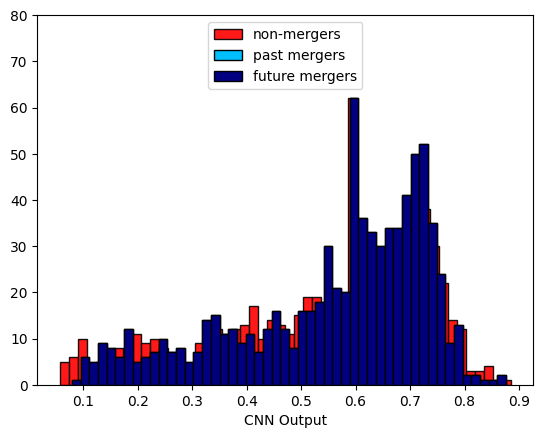

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, PowerNorm

# plot histogram
bins = 50
plt.hist(non, bins, alpha=0.9, label='non-mergers', color='red', edgecolor='black', linewidth=1)
plt.hist(past, bins, alpha=1, label='past mergers', color='deepskyblue', edgecolor='black', linewidth=1)
plt.hist(future, bins, alpha=1, label='future mergers', color='navy', edgecolor='black', linewidth=1)
plt.legend(loc='upper center')
plt.xticks(np.arange(0.1, 1.0, step=0.1)) # Ajuste a escala do eixo x
plt.yticks(np.arange(0, 81, step=10)) # Ajuste a escala do eixo y para 0 a 80
plt.xlabel("CNN Output")
plt.show()

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, PowerNorm
from tensorflow.keras import models
from tensorflow.keras import backend as K
from tensorflow.keras.utils import  plot_model
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf
from sklearn.model_selection import StratifiedShuffleSplit
import cv2

97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step


IndexError: index 19 is out of bounds for axis 1 with size 19

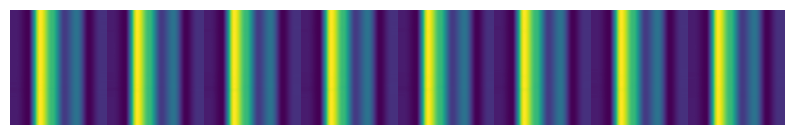

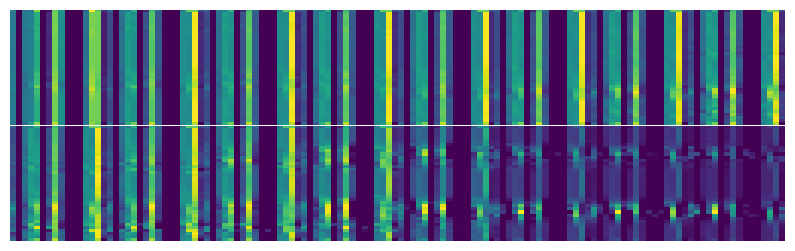

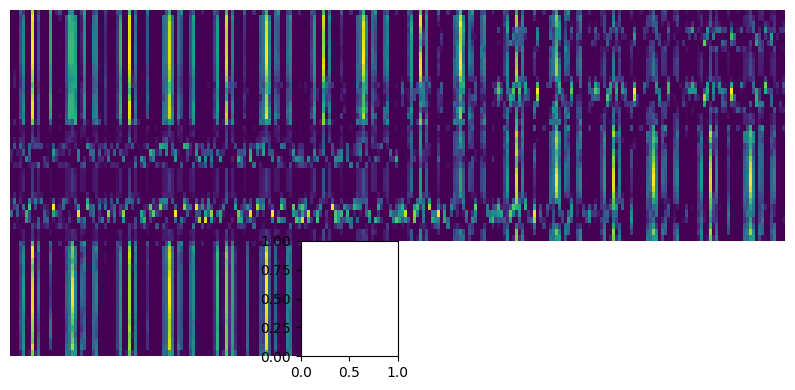

In [115]:
# Extracts the outputs of all layers except the input layer
layer_outputs = [layer.output for layer in loaded_model.layers[1:]] 
# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=loaded_model.input, outputs=layer_outputs) 

# returns the values of the layer activations in the original model
# Returns a list of Numpy arrays: one array per layer activation
activations = activation_model.predict(X_test) 

# activation maps for all 8 filters in the first convolutional layer
fig1=plt.figure(figsize=(10,1.5))  
for i in range(8):
    plt.subplot(1, 8, i + 1)
    layer_activation = activations[0]
    plt.imshow(layer_activation[example_index,i, :, :], cmap='viridis',aspect='auto')
    plt.axis("off")
    plt.subplots_adjust(hspace=0, wspace=0)

# activation maps for all 16 filters in the second convolutional layer    
fig2=plt.figure(figsize=(10,3))  
for i in range(16):
    plt.subplot(2, 8, i + 1)
    layer_activation = activations[4]
    plt.imshow(layer_activation[example_index,i, :, :], cmap='viridis',aspect='auto')
    plt.axis("off")
    plt.subplots_adjust(hspace=0, wspace=0)
    
# activation maps for all 32 filters in the third convolutional layer
fig3=plt.figure(figsize=(10,6))  
for i in range(32):
    plt.subplot(4, 8, i + 1)
    layer_activation = activations[8]
    plt.imshow(layer_activation[example_index,i, :, :], cmap='viridis',aspect='auto')
    plt.axis("off")
    plt.subplots_adjust(hspace=0, wspace=0)

In [116]:
def find_layer_idx(model, layer_name):
    # Busca um índice da camada por nome.
    layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]
    return layer_idx

def visualize_cam(model, layer_idx, filter_indices, seed_input, penultimate_layer_idx,
                  backprop_modifier='guided'):
    # Define a função de perda como a saída da camada escolhida.
    loss = K.mean(model.layers[layer_idx].output[..., filter_indices])
    # Define as variáveis de entrada como a entrada do modelo.
    grads = K.gradients(loss, model.input)[0]
    
    # Calcula o valor dos gradientes e ativações da camada penultimate.
    iterate = K.function(
        [model.input], [loss, grads, model.layers[penultimate_layer_idx].output]
    )

    # Obtém os valores para a entrada especificada.
    loss_value, grads_value, penultimate_activation_value = iterate(
        [seed_input]
    )

    # Aplica o backprop modifier (guided) aos gradientes.
    if backprop_modifier == 'guided':
        grads_value = np.where(grads_value > 0, grads_value, 0.0)
        grads_value = np.where(penultimate_activation_value > 0, grads_value, 0.0)

    # Calcula o mapa de calor.
    cam = np.zeros(penultimate_activation_value.shape[1:], dtype=np.float32)
    for i, w in enumerate(grads_value[0]):
        cam += w * penultimate_activation_value[0, :, :, i]

    # Normaliza o mapa de calor.
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam)

    # Define a função para pré-processar as imagens para o VGG16.
    def preprocess_image(image):
        image = image.astype(np.float32)
        return preprocess_input(image)

    # Pré-processa a imagem de entrada.
    processed_image = preprocess_image(seed_input)

    # Define a função para gerar a imagem com o mapa de calor.
    def generate_heatmap(heatmap, image):
        # Faz o resize do mapa de calor para o tamanho da imagem.
        heatmap = np.uint8(255 * heatmap)
        heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[2]))

        # Aplica a cor ao mapa de calor.
        jet = plt.get_cmap('jet')
        jet_colors = jet(np.arange(256))
        jet_heatmap = jet_colors[heatmap]

        # Faz a superposição do mapa de calor na imagem.
        jet_heatmap = jet_heatmap[:, :, :3]
        jet_heatmap = image + 0.5 * jet_heatmap
        jet_heatmap = np.clip(jet_heatmap, 0, 1)

        return jet_heatmap

    # Gera o mapa de calor.
    jet_heatmap = generate_heatmap(heatmap, processed_image)

    # Retorna o mapa de calor.
    return jet_heatmap
    
# set channel_first data format in Keras backend in order for grad-CAM to work properly
K.set_image_data_format('channels_first')

# find the last convolutional layer
penultimate_layer = find_layer_idx(loaded_model, 'conv2d_3')
class_idx = 0 # choose the class position in the output layer, here 0 since the output has just one dimention
layer_idx = -1 # location of the output layer
# make a list of four TP, FP, TN and FN high-probability examples 
example_list=[example_i_TP[22],example_i_TP[2],example_i_TP[4],example_i_TP[5],
             example_i_FP[1],example_i_FP[7],example_i_FP[3],example_i_FP[4],
             example_i_TN[2],example_i_TN[3],example_i_TN[11],example_i_TN[5],
             example_i_FN[1],example_i_FN[2],example_i_FN[15],example_i_FN[5]]

fig1=plt.figure(figsize=(7,7))
fig1.suptitle("TP, FP, TN and FN (from top to bottom rows) high-probability examples (grad-CAMs of the last convolutional layer)")

for i in range(16):
    grads = visualize_cam(loaded_model, layer_idx, filter_indices=0, 
                              seed_input=X_test[example_list[i]], penultimate_layer_idx=penultimate_layer,
                              backprop_modifier='guided')
    plt.subplot(4, 4, i + 1)
    plt.axis("off")
    
    plt.imshow(grads, aspect='auto', cmap='viridis')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()
# make a list of four TP, FP, TN and FN low-probability examples 
bad_example_list=[bad_example_i_TP[22],bad_example_i_TP[2],bad_example_i_TP[4],bad_example_i_TP[5],
             bad_example_i_FP[1],bad_example_i_FP[7],bad_example_i_FP[3],bad_example_i_FP[4],
             bad_example_i_TN[13],bad_example_i_TN[20],bad_example_i_TN[11],bad_example_i_TN[5],
             bad_example_i_FN[1],bad_example_i_FN[7],bad_example_i_FN[15],bad_example_i_FN[5]]

fig1=plt.figure(figsize=(7,7))
fig1.suptitle("TP, FP, TN and FN (from top to bottom rows) low-probability examples (grad-CAMs of the last convolutional layer)")

for i in range(16):
    grads = visualize_cam(loaded_model, layer_idx, filter_indices=0, 
                              seed_input=X_test[bad_example_list[i]], penultimate_layer_idx=penultimate_layer,
                              backprop_modifier='guided')
    plt.subplot(4, 4, i + 1)
    plt.axis("off")
    
    plt.imshow(grads, aspect='auto', cmap='viridis')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

IndexError: list index out of range

In [ ]:
def find_layer_idx(model, layer_name):
    # Busca um índice da camada por nome.
    layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]
    return layer_idx

def visualize_cam(model, layer_idx, filter_indices, seed_input, penultimate_layer_idx,
                  backprop_modifier='guided'):
    # Define a função de perda como a saída da camada escolhida.
    loss = K.mean(model.layers[layer_idx].output[..., filter_indices])
    # Define as variáveis de entrada como a entrada do modelo.
    grads = K.gradients(loss, model.input)[0]
    
    # Calcula o valor dos gradientes e ativações da camada penultimate.
    iterate = K.function(
        [model.input], [loss, grads, model.layers[penultimate_layer_idx].output]
    )

    # Obtém os valores para a entrada especificada.
    loss_value, grads_value, penultimate_activation_value = iterate(
        [seed_input]
    )

    # Aplica o backprop modifier (guided) aos gradientes.
    if backprop_modifier == 'guided':
        grads_value = np.where(grads_value > 0, grads_value, 0.0)
        grads_value = np.where(penultimate_activation_value > 0, grads_value, 0.0)

    # Calcula o mapa de calor.
    cam = np.zeros(penultimate_activation_value.shape[1:], dtype=np.float32)
    for i, w in enumerate(grads_value[0]):
        cam += w * penultimate_activation_value[0, :, :, i]

    # Normaliza o mapa de calor.
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam)

    # Define a função para pré-processar as imagens para o VGG16.
    def preprocess_image(image):
        image = image.astype(np.float32)
        return preprocess_input(image)

    # Pré-processa a imagem de entrada.
    processed_image = preprocess_image(seed_input)

    # Define a função para gerar a imagem com o mapa de calor.
    def generate_heatmap(heatmap, image):
        # Faz o resize do mapa de calor para o tamanho da imagem.
        heatmap = np.uint8(255 * heatmap)
        heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[2]))

        # Aplica a cor ao mapa de calor.
        jet = plt.get_cmap('jet')
        jet_colors = jet(np.arange(256))
        jet_heatmap = jet_colors[heatmap]

        # Faz a superposição do mapa de calor na imagem.
        jet_heatmap = jet_heatmap[:, :, :3]
        jet_heatmap = image + 0.5 * jet_heatmap
        jet_heatmap = np.clip(jet_heatmap, 0, 1)

        return jet_heatmap

    # Gera o mapa de calor.
    jet_heatmap = generate_heatmap(heatmap, processed_image)

    # Retorna o mapa de calor.
    return jet_heatmap

In [ ]:
# set channel_first data format in Keras backend in order for grad-CAM to work properly
K.set_image_data_format('channels_first')

# find the last convolutional layer
penultimate_layer = find_layer_idx(loaded_model, 'conv2d_3')
class_idx = 0 # choose the class position in the output layer, here 0 since the output has just one dimention
layer_idx = -1 # location of the output layer
# make a list of four TP, FP, TN and FN high-probability examples 
example_list=[example_i_TP[22],example_i_TP[2],example_i_TP[4],example_i_TP[5],
             example_i_FP[1],example_i_FP[7],example_i_FP[3],example_i_FP[4],
             example_i_TN[2],example_i_TN[3],example_i_TN[11],example_i_TN[5],
             example_i_FN[1],example_i_FN[2],example_i_FN[15],example_i_FN[5]]

fig1=plt.figure(figsize=(7,7))
fig1.suptitle("TP, FP, TN and FN (from top to bottom rows) high-probability examples (grad-CAMs of the last convolutional layer)")

for i in range(16):
    grads = visualize_cam(loaded_model, layer_idx, filter_indices=0, 
                              seed_input=X_test[example_list[i]], penultimate_layer_idx=penultimate_layer,
                              backprop_modifier='guided')
    plt.subplot(4, 4, i + 1)
    plt.axis("off")
    
    plt.imshow(grads, aspect='auto', cmap='viridis')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()
# make a list of four TP, FP, TN and FN low-probability examples 
bad_example_list=[bad_example_i_TP[22],bad_example_i_TP[2],bad_example_i_TP[4],bad_example_i_TP[5],
             bad_example_i_FP[1],bad_example_i_FP[7],bad_example_i_FP[3],bad_example_i_FP[4],
             bad_example_i_TN[13],bad_example_i_TN[20],bad_example_i_TN[11],bad_example_i_TN[5],
             bad_example_i_FN[1],bad_example_i_FN[7],bad_example_i_FN[15],bad_example_i_FN[5]]

fig1=plt.figure(figsize=(7,7))
fig1.suptitle("TP, FP, TN and FN (from top to bottom rows) low-probability examples (grad-CAMs of the last convolutional layer)")

for i in range(16):
    grads = visualize_cam(loaded_model, layer_idx, filter_indices=0, 
                              seed_input=X_test[bad_example_list[i]], penultimate_layer_idx=penultimate_layer,
                              backprop_modifier='guided')
    plt.subplot(4, 4, i + 1)
    plt.axis("off")
    
    plt.imshow(grads, aspect='auto', cmap='viridis')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [ ]:
# largest output probabilities
example_i_TP=[]
example_i_FP=[]
example_i_TN=[]
example_i_FN=[]

for i in range(len(prob)):
    if prob[i] > 0.90 and y_test[i]==1:
        example_i_TP.append(i) 
    if prob[i] > 0.80 and y_test[i]==0:
        example_i_FP.append(i) 
        
        
for i in range(len(prob)):
    if prob[i] < 0.1 and y_test[i]==0:
        example_i_TN.append(i) 
    if prob[i] < 0.15 and y_test[i]==1:
        example_i_FN.append(i) 
        
        
# lowest output probabilities
bad_example_i_TP=[]
bad_example_i_FP=[]
bad_example_i_TN=[]
bad_example_i_FN=[]

for i in range(len(prob)):
    if 0.5 < prob[i] < 0.55 and y_test[i]==1:
        bad_example_i_TP.append(i) 
    if 0.5 < prob[i] < 0.58 and y_test[i]==0:
        bad_example_i_FP.append(i) 
        
        
for i in range(len(prob)):
    if 0.44 < prob[i] < 0.5 and y_test[i]==0:
        bad_example_i_TN.append(i) 
    if 0.44 < prob[i] < 0.5 and y_test[i]==1:
        bad_example_i_FN.append(i) 

In [ ]:
# set channel_first data format in Keras backend in order for grad-CAM to work properly
K.set_image_data_format('channels_first')

# find the last convolutional layer
penultimate_layer = utils.find_layer_idx(loaded_model, 'conv2d_3')
class_idx = 0 # choose the class position in the output layer, here 0 since the output has just one dimention
layer_idx = -1 # location of the output layer

In [ ]:
# make a list of four TP, FP, TN and FN high-probability examples 
example_list=[example_i_TP[22],example_i_TP[2],example_i_TP[4],example_i_TP[5],
             example_i_FP[1],example_i_FP[7],example_i_FP[3],example_i_FP[4],
             example_i_TN[2],example_i_TN[3],example_i_TN[11],example_i_TN[5],
             example_i_FN[1],example_i_FN[2],example_i_FN[15],example_i_FN[5]]

fig1=plt.figure(figsize=(7,7))
fig1.suptitle("TP, FP, TN and FN (from top to bottom rows) high-probability examples (grad-CAMs of the last convolutional layer)")

for i in range(16):
    grads = visualize_cam(loaded_model, layer_idx, filter_indices=0, 
                              seed_input=x_test[example_list[i]], penultimate_layer_idx=penultimate_layer,
                              backprop_modifier='guided')
    plt.subplot(4, 4, i + 1)
    plt.axis("off")
    
    plt.imshow(grads, aspect='auto', cmap='viridis')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [ ]:
# make a list of four TP, FP, TN and FN low-probability examples 
bad_example_list=[bad_example_i_TP[22],bad_example_i_TP[2],bad_example_i_TP[4],bad_example_i_TP[5],
             bad_example_i_FP[1],bad_example_i_FP[7],bad_example_i_FP[3],bad_example_i_FP[4],
             bad_example_i_TN[13],bad_example_i_TN[20],bad_example_i_TN[11],bad_example_i_TN[5],
             bad_example_i_FN[1],bad_example_i_FN[7],bad_example_i_FN[15],bad_example_i_FN[5]]

fig1=plt.figure(figsize=(7,7))
fig1.suptitle("TP, FP, TN and FN (from top to bottom rows) low-probability examples (grad-CAMs of the last convolutional layer)")

for i in range(16):
    grads = visualize_cam(loaded_model, layer_idx, filter_indices=0, 
                              seed_input=x_test[bad_example_list[i]], penultimate_layer_idx=penultimate_layer,
                              backprop_modifier='guided')
    plt.subplot(4, 4, i + 1)
    plt.axis("off")
    
    plt.imshow(grads, aspect='auto', cmap='viridis')
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [ ]:
# Bootstraping is used to show errors of different clasificaiton scoring methods. 
# We make 1000 bootstraping resamples and recalculate AUC, accuracy etc.
# Then we find 95% CI for these values.

y_pred = pred # output class 0 or 1
y_prob = prob # output probability between 0 and 1
y_true = y_test # true class 0 or 1

n_bootstraps = 1000
rng_seed = 3  # controls reproducibility
bootstrapped_auc = []
bootstrapped_accuracy = []
bootstrapped_precision = []
bootstrapped_recall = []
bootstrapped_f1 = []
bootstrapped_brier = []
bootstrapped_fpr = []
bootstrapped_tpr = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_prob) - 1, len(y_prob))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score_auc = roc_auc_score(y_true[indices], y_prob[indices])
    bootstrapped_auc.append(score_auc)
   
    score_acc = accuracy_score(y_true[indices], y_pred[indices])
    bootstrapped_accuracy.append(score_acc)
    
    score_precision = precision_score(y_true[indices], y_pred[indices])
    bootstrapped_precision.append(score_precision)
    
    score_recall = recall_score(y_true[indices], y_pred[indices])
    bootstrapped_recall.append(score_recall)
    
    score_f1 = f1_score(y_true[indices], y_pred[indices])
    bootstrapped_f1.append(score_f1)
    
    score_brier = brier_score_loss(y_true[indices], y_prob[indices])
    bootstrapped_brier.append(score_brier)
    
    fpr_score, tpr_score, thresholds_score = metrics.roc_curve(y_true[indices], y_prob[indices], pos_label=1)
    bootstrapped_fpr.append(fpr_score)
    bootstrapped_tpr.append(tpr_score)

In [ ]:
# we can plot histograms to see the bootstraped values
# change to "bootstrapped_accuracy,bootstrapped_precision,bootstrapped_recall,
# bootstrapped_f1,bootstrapped_brier", for other histograms
plt.hist(bootstrapped_auc, bins=50)
plt.title('Histogram of the bootstrapped ROC AUC scores')
plt.show()

In [ ]:
sorted_auc = np.array(bootstrapped_auc)
sorted_acc = np.array(bootstrapped_accuracy)
sorted_precision = np.array(bootstrapped_precision)
sorted_recall = np.array(bootstrapped_recall)
sorted_f1 = np.array(bootstrapped_f1)
sorted_brier = np.array(bootstrapped_brier)

sorted_auc.sort()
sorted_acc.sort()
sorted_precision.sort()
sorted_recall.sort()
sorted_f1.sort()
sorted_brier.sort()

# Computing the lower and upper bound of the 95% confidence interval
confidence_lower_auc = sorted_auc[int(0.025 * len(sorted_auc))]
confidence_upper_auc = sorted_auc[int(0.975 * len(sorted_auc))]

confidence_lower_acc = sorted_acc[int(0.025 * len(sorted_acc))]
confidence_upper_acc = sorted_acc[int(0.975 * len(sorted_acc))]
                                 
confidence_lower_precision = sorted_precision[int(0.025 * len(sorted_precision))]
confidence_upper_precision = sorted_precision[int(0.975 * len(sorted_precision))]
                                 
confidence_lower_recall = sorted_recall[int(0.025 * len(sorted_recall))]
confidence_upper_recall = sorted_recall[int(0.975 * len(sorted_recall))]
                                       
confidence_lower_f1 = sorted_f1[int(0.025 * len(sorted_f1))]
confidence_upper_f1 = sorted_f1[int(0.975 * len(sorted_f1))]
                                 
confidence_lower_brier = sorted_brier[int(0.025 * len(sorted_brier))]
confidence_upper_brier = sorted_brier[int(0.975 * len(sorted_brier))]


print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_prob)))
print("95% Confidence interval for the AUC score: [{:0.3} - {:0.3}]".format(
    confidence_lower_auc, confidence_upper_auc))
print("95%CI AUC errors are: [{:0.3} , {:0.3}]".format(
    confidence_lower_auc - roc_auc_score(y_true, y_prob), 
    confidence_upper_auc - roc_auc_score(y_true, y_prob)))

print("Original Accuracy: {:0.3f}".format(accuracy_score(y_true, y_pred)))
print("95% Confidence interval for the Accuracy: [{:0.3} - {:0.3}]".format(
    confidence_lower_acc, confidence_upper_acc))
print("95%CI Accuracy errors are: [{:0.3} , {:0.3}]".format(
    confidence_lower_acc - accuracy_score(y_true, y_pred), 
    confidence_upper_acc - accuracy_score(y_true, y_pred)))

print("Original Precision: {:0.3f}".format(precision_score(y_true, y_pred)))
print("95% Confidence interval for the Precision: [{:0.3} - {:0.3}]".format(
    confidence_lower_precision, confidence_upper_precision))
print("95%CI Precision errors are: [{:0.3} , {:0.3}]".format(
    confidence_lower_precision - precision_score(y_true, y_pred), 
    confidence_upper_precision - precision_score(y_true, y_pred)))

print("Original Recall: {:0.3f}".format(recall_score(y_true, y_pred)))
print("95% Confidence interval for the Recall: [{:0.3} - {:0.3}]".format(
    confidence_lower_recall, confidence_upper_recall))
print("95%CI Recall errors are: [{:0.3} , {:0.3}]".format(
    confidence_lower_recall - recall_score(y_true, y_pred), 
    confidence_upper_recall - recall_score(y_true, y_pred)))

print("Original F1 score: {:0.3f}".format(f1_score(y_true, y_pred)))
print("95% Confidence interval for the F1 score: [{:0.3} - {:0.3}]".format(
    confidence_lower_f1, confidence_upper_f1))
print("95%CI F1 score errors are: [{:0.3} , {:0.3}]".format(
    confidence_lower_f1 - f1_score(y_true, y_pred), 
    confidence_upper_f1 - f1_score(y_true, y_pred)))

print("Original Brier score: {:0.3f}".format(brier_score_loss(y_true, y_prob)))
print("95% Confidence interval for the Brier score: [{:0.3} - {:0.3}]".format(
    confidence_lower_brier, confidence_upper_brier))
print("95%CI Brier score errors are: [{:0.3} , {:0.3}]".format(
    confidence_lower_brier - brier_score_loss(y_true, y_prob), 
    confidence_upper_brier - brier_score_loss(y_true, y_prob)))

In [ ]:
# We can also find 95%CI (in vertical direction) for the ROC curve

tprs = []
base_fpr = np.linspace(0, 1, 1001)

for i in range(len(bootstrapped_fpr)):  
    tpr1 = interp(base_fpr, bootstrapped_fpr[i], bootstrapped_tpr[i])
    tpr1[0] = 0.0
    tprs.append(tpr1)

tprs = np.array(tprs)
mean = tprs.mean(axis=0) # mean tpr
std = tprs.std(axis=0) # standard deviation of tpr

# 95%CI can be calculated as:
tprs_upper_95 = mean + 1.96*std  # 1.96 is z-score for 95%CI
tprs_lower_95 = mean - 1.96*std


# Plots ROC curve with 95%CI in the vertical direction
figsize=(6,6)
fig, axis1 = plt.subplots(figsize=figsize)
x_onetoone = y_onetoone = [0, 1]

prist = plt.plot(fpr, tpr, 'navy', linewidth=2, label='pristine images')
prist_fill = plt.fill_between(base_fpr, tprs_lower_95, tprs_upper_95, color='deepskyblue', alpha=0.9, label='95%CI pristine images')
line = plt.plot(x_onetoone, y_onetoone, 'k--',linewidth=1, label="1-1")


plt.legend(loc='lower right')
plt.xlabel("False Positive (1 - Specificity)")
plt.ylabel("True Positive (Selectivity)")
plt.tight_layout()